In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mlxtend.plotting import plot_decision_regions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import (
    accuracy_score, confusion_matrix, f1_score, precision_score, recall_score,
    plot_roc_curve, plot_precision_recall_curve
)

from ch4_metrics import evaluate_classifier

In [2]:
default_data = pd.read_csv('../data/default.csv')

In [3]:
default_data['is_student'] = default_data['student'].map({'No': 0, 'Yes': 1})
default_data['defaulted'] = default_data['default'].map({'No': 0, 'Yes': 1})

In [4]:
# use all data to train lda, no testing data
X = default_data[['balance', 'is_student']].to_numpy()
y = default_data['defaulted'].to_numpy()

In [5]:
classifier = LinearDiscriminantAnalysis()
classifier.fit(X, y)

LinearDiscriminantAnalysis()

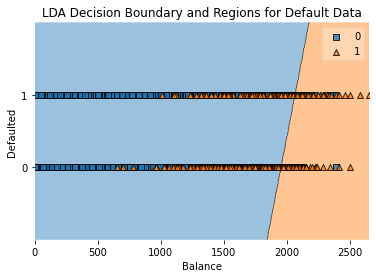

In [6]:
ax = plot_decision_regions(X, y, clf=classifier)
ax.set_title('LDA Decision Boundary and Regions for Default Data')
ax.set_xlabel('Balance')
ax.set_ylabel('Defaulted')
ax.set_yticks([0, 1])
plt.show()

In [7]:
# evaluating using training data
evaluate_classifier(X, y, classifier)

Accuracy: 0.9725
Null Accuracy:0.9667


Confusion Matrix:
[[9644   23]
 [ 252   81]]

F1 Score: 0.371
Precision: 0.779
Recall: 0.243


LDA with default threshold of 0.5 

|            | Predicted No | Predicted Yes |
|     :-:    |     :-:      |      :-:      | 
| Actual No  |    9644      |       23      | 
| Actual Yes |     252      |       81      |

In [8]:
# adjust threshold of 0.22 
evaluate_classifier(X, y, classifier, threshold=0.22)

Accuracy: 0.9657
Null Accuracy:0.9667


Confusion Matrix:
[[9472  195]
 [ 148  185]]

F1 Score: 0.519
Precision: 0.487
Recall: 0.556
